In [2]:
import pandas as pd
import plotting_util
from math import ceil

df = pd.read_parquet("out/can_data.parquet")
print(df.columns)

Index(['subject_id', 'subject_state', 'subject_scenario', 'timestamp', 'steer',
       'latpos', 'gas', 'brake', 'clutch', 'Thw', 'velocity', 'acc', 'latvel',
       'dtoint', 'heading', 'SpeedDif', 'LaneDirection', 'SteerError',
       'SteerSpeed', 'Ttc', 'TtcOpp', 'LeftDis', 'RightDis', 'AheadDis',
       'ypos', 'xpos', 'YawRate', 'traflight', 'handbrake', 'engine',
       'indicator_right', 'indicator_left', 'gas_slope', 'brake_slope',
       'latvel_acc', 'SteerSpeed_acc', 'YawRate_acc', 'latvel_jerk',
       'SteerSpeed_jerk', 'YawRate_jerk'],
      dtype='object')


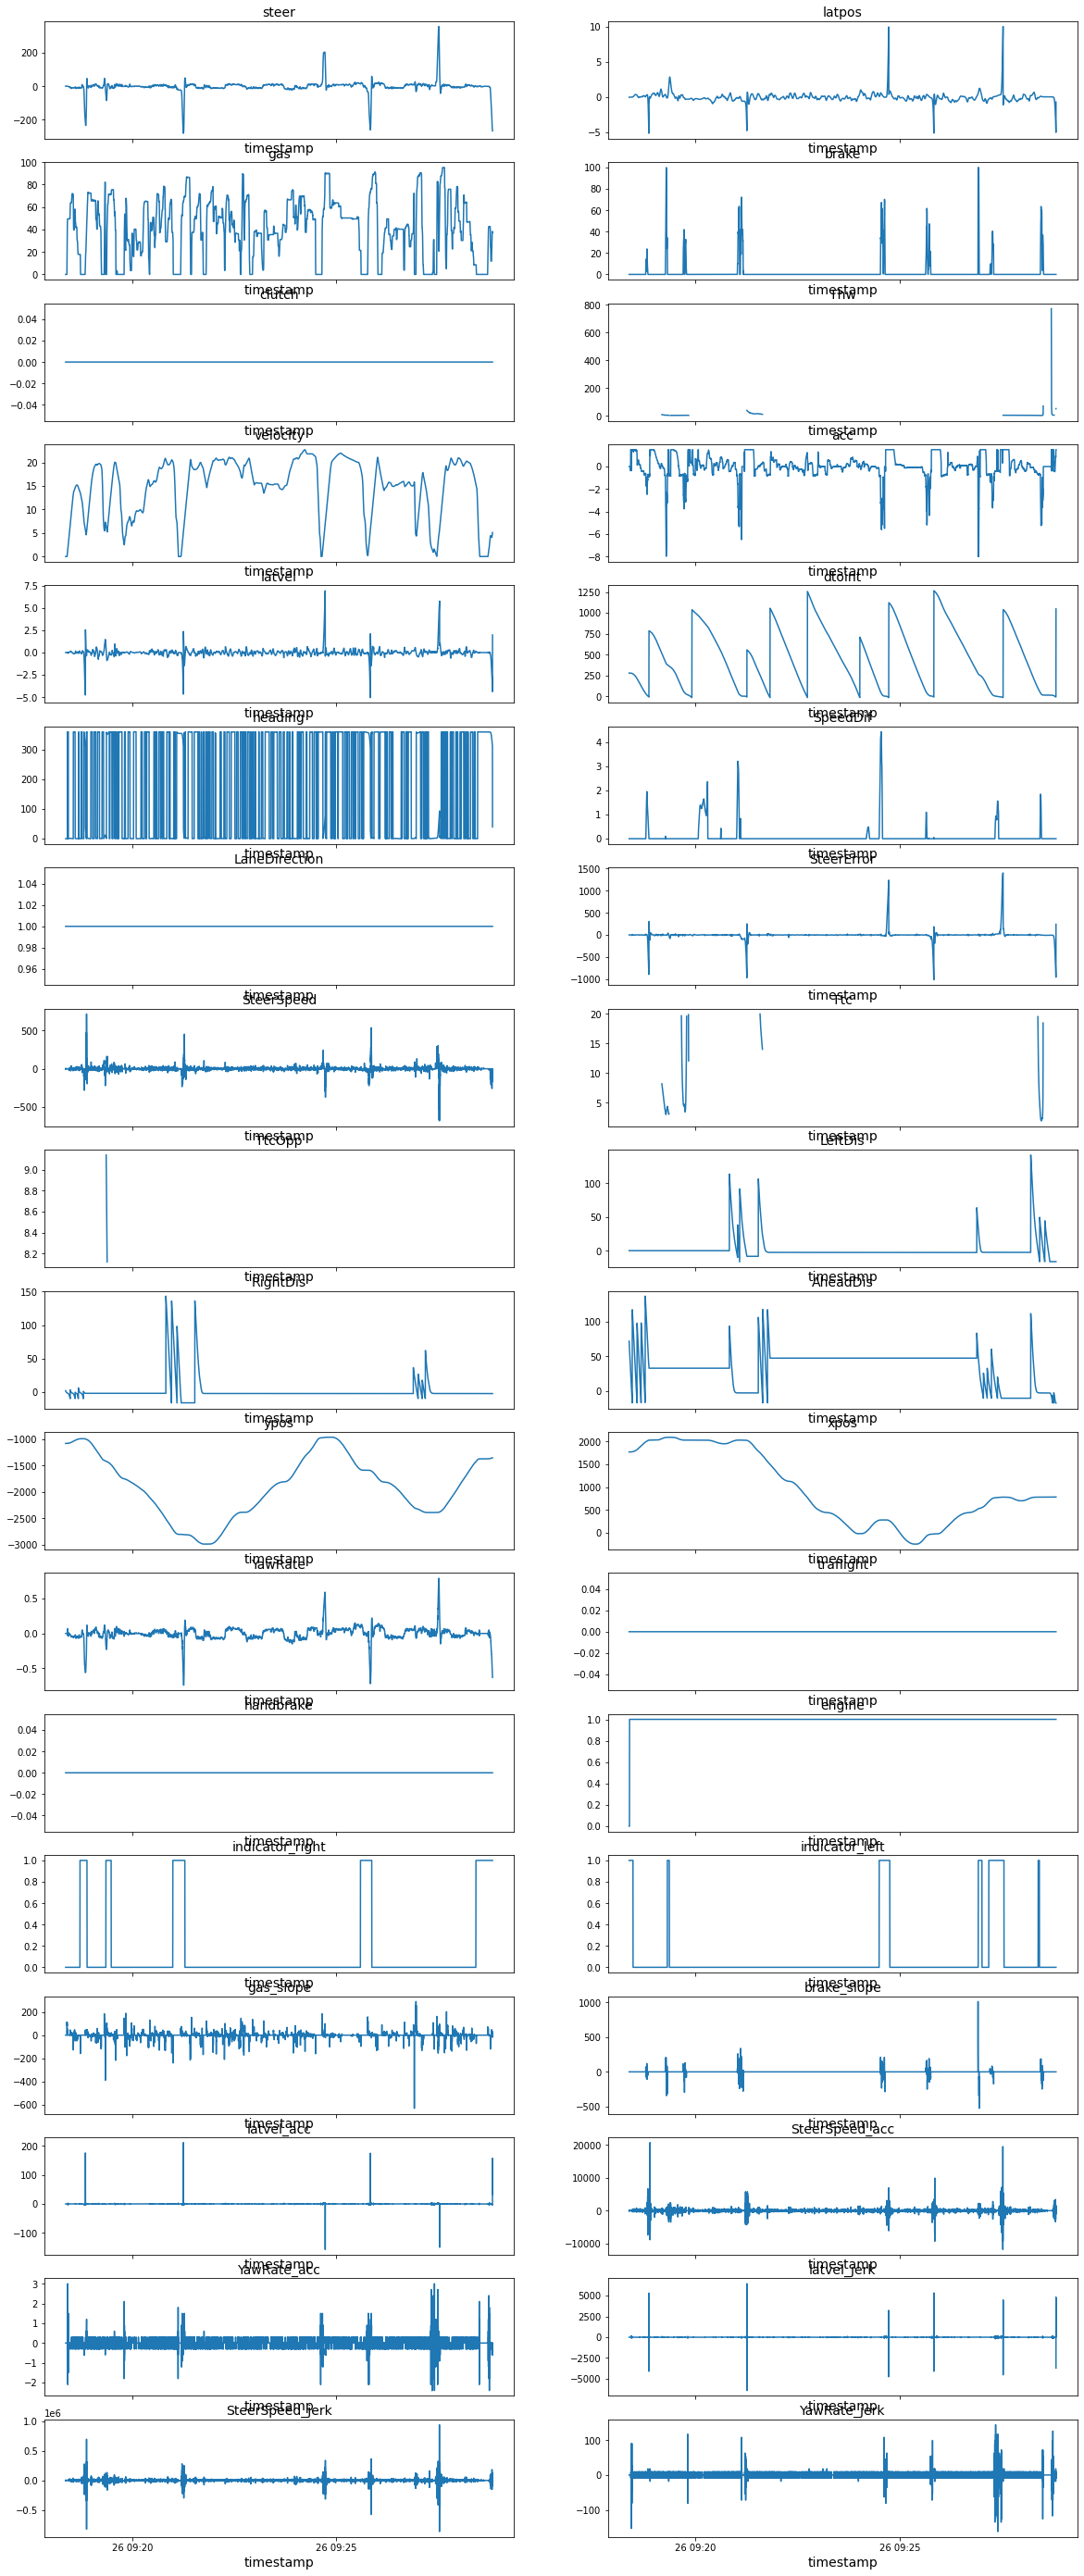

In [3]:
subject_006_sober_rural = df[(df['subject_id'] == '006') & (df['subject_state'] == 'sober') & (df['subject_scenario'] == 'rural')]

times = subject_006_sober_rural['timestamp']

nr_df_cols = len(subject_006_sober_rural.iloc[:, 4:].columns)
nr_rows = ceil(nr_df_cols / 2.0)
nr_cols = 2

fig, axes = plotting_util.create_plot(nr_rows, nr_cols, True, False)
for axs, row in zip(axes, list(range(nr_rows))):
    for ax, col in zip(axs, list(range(nr_cols))):
        plotting_util.set_plot_axis_labels(ax, 'timestamp', '')
        plotting_util.set_plot_title(ax, subject_006_sober_rural.iloc[:, 4+2*row+col].name)
        ax.plot(times, subject_006_sober_rural.iloc[:, 4+2*row+col])
plotting_util.set_figure_size(fig, 20, 50)